In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
tf.random.set_seed(1234)  

## Dataset

### tf.data.Dataset.range

In [ ]:
# Create a Dataset of sequential numbers
# --------------------------------------
print("Dataset.range examples:")
print("-----------------------")

range_dataset = tf.data.Dataset.range(0, 20, 1)

print("\n1. Dataset")
for el in range_dataset:
    print(el)

# Divide in batches
bs = 3
range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False)

print("\n2. Dataset + batch")
for el in range_dataset:
    print(el)

# Apply a transformation to each element
def map_fn(x):
    return x**2

range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False).map(map_fn)

print("\n3. Dataset + batch + map")
for el in range_dataset:
    print(el)

# Filter dataset based on a condition
def filter_fn(x):
    return tf.equal(tf.math.mod(x, 2), 0)

range_dataset = tf.data.Dataset.range(0, 20, 1).filter(filter_fn)

print("\n4. Dataset + filter")
for el in range_dataset:
    print(el)

# Random shuffling
range_dataset = tf.data.Dataset.range(0, 20, 1).shuffle(
    buffer_size=20, reshuffle_each_iteration=False, seed=1234).batch(bs)

print("\n5. Dataset + shuffle + batch")
for el in range_dataset:
    print(el)



### tf.data.Dataset.from_tensors

In [4]:
# Create Dataset as unique element
# --------------------------------
from_tensors_dataset = tf.data.Dataset.from_tensors([1, 2, 3, 4, 5, 6, 7, 8, 9])

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in from_tensors_dataset:
    print(el)

Dataset.from_tensors example:
-----------------------------
tf.Tensor([1 2 3 4 5 6 7 8 9], shape=(9,), dtype=int32)


### tf.data.Dataset.from_tensor_slices

In [5]:
# Create a Dataset of slices
# --------------------------

# All the elements must have the same size in first dimension (axis 0)
from_tensor_slices_dataset = tf.data.Dataset.from_tensor_slices(
    (np.random.uniform(size=[10, 2, 2]), np.random.randint(10, size=[10])))

print("Dataset.from_tensor_slices example:")
print("-----------------------------")
for el in from_tensor_slices_dataset:
    print(el)

Dataset.from_tensor_slices example:
-----------------------------
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.43527116, 0.58467553],
       [0.99176275, 0.70880063]])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.67072721, 0.50087774],
       [0.61805936, 0.47731326]])>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.46599199, 0.90321091],
       [0.92192004, 0.14551479]])>, <tf.Tensor: shape=(), dtype=int64, numpy=8>)
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.73472529, 0.14100383],
       [0.45089969, 0.78578921]])>, <tf.Tensor: shape=(), dtype=int64, numpy=8>)
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.89323905, 0.63395722],
       [0.38254406, 0.69997372]])>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.71768866, 0.13427392],
       [0.20822038, 0.78586375]])>, <

### tf.data.Dataset.zip

In [ ]:
# Combine multiple datasets
# -------------------------
x = tf.data.Dataset.from_tensor_slices(np.random.uniform(size=10))
y = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9])

zipped = tf.data.Dataset.zip((x, y))

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in zipped:
    print(el)

In [ ]:
# Iterate over range dataset
# --------------------------

# for a in b
for el in zipped:
    print(el)
    
print('\n')
    
# for a in enumerate(b)
for el_idx, el in enumerate(zipped):
    print(el)
    
print('\n')
    
# get iterator
iterator = iter(zipped)
print(next(iterator))

# Example: Fashion MNIST - Multi-class classification
## Dataset

In [6]:
# Load built-in dataset
# ---------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## From dataset info:
'''
Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.
'''

## [E]
'''
An image is (28,28) array, so in the cell below, we can see that the shape of x_train is (6000, 28, 28) since we have 6000 images
 - also, each position in the (28,28) array is a pixel, which is just a value from 1 to 255 that indicates darkness level.
In y_train we have the type of the item in the picture, there are 10 types, the dataset indicates the correct one with an int
We split the dataset into validation and training sets.
'''

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train.shape
y_train.shape

(60000, 28, 28)

(60000,)

In [46]:
# Split in training and validation sets
# e.g., 50000 samples for training and 10000 samples for validation

x_valid = x_train[50000:, ...] 
y_valid = y_train[50000:, ...] 

x_train = x_train[:50000, ...]
y_train = y_train[:50000, ...]

In [72]:
# Create Training Dataset object
# ------------------------------
## [E] combine x and y so for each image we have its respective type
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0])

# Normalize images
## [E] Normalize the color (from 1 to 255) to 0 to 1
def normalize_img(x_, y_):
    return tf.cast(x_, tf.float32) / 255., y_

train_dataset = train_dataset.map(normalize_img)

# 1-hot encoding <- for categorical cross entropy
## [E] instead of indicating the item type with an int, use a size 10 bool array with a 1 in the type position
def to_categorical(x_, y_):
    return x_, tf.one_hot(y_, depth=10)

train_dataset = train_dataset.map(to_categorical)

# Divide in batches
bs = 32
train_dataset = train_dataset.batch(bs)

# Repeat
# Without calling the repeat function the dataset 
# will be empty after consuming all the images
train_dataset = train_dataset.repeat()

In [70]:
# Create Validation Dataset  
# -----------------------
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

# Normalize images
valid_dataset = valid_dataset.map(normalize_img)

# 1-hot encoding
valid_dataset = valid_dataset.map(to_categorical)

# Divide in batches
valid_dataset = valid_dataset.batch(1)

# Repeat
valid_dataset = valid_dataset.repeat()

In [54]:
# Create Test Dataset
# -------------------
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

test_dataset = test_dataset.map(normalize_img)

test_dataset = test_dataset.map(to_categorical)

test_dataset = test_dataset.batch(1)

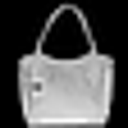

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.07450981,
        0.01568628, 0.        , 0.00392157, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.03137255, 0.5372549 , 0.4862745 ,
        0.45490196, 0.3647059 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.05098039, 0.68235296, 

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [40]:
# Check that is everything is ok with the dataloader

iterator = iter(train_dataset)
sample, target = next(iterator)

# Just for visualization purpouses
sample_ = sample[0, ...]  # select first image in the batch

from PIL import Image
## [E] *255 since we have to un-normalize it (we wouldnt do this, its just to show the image)
img = Image.fromarray(np.uint8(np.array(sample_)*255.))
img = img.resize([128, 128])
img

sample_
target[0]  # select corresponding target

## Model

In [58]:
# Fashion MNIST classification
# ----------------------------

# x: 28x28
# y: 10 classes

# Create Model
# ------------
# e.g. in: 28x28 -> h: 10 units -> out: 10 units (number of classes) 

# Define Input keras tensor
x = tf.keras.Input(shape=[28, 28])

# Define intermediate hidden layers and chain
flatten = tf.keras.layers.Flatten()(x)  
h = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid)(flatten)

# Define output layer and chain

# Define the last fully-connected layer, which is composed by 10 neurons (the number of classes). 
# Finally, the softmax activation function is applied for multiclass classification
out = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)(h) 

# Create Model instance defining inputs and outputs
model = tf.keras.Model(inputs=x, outputs=out) # Note: you can have a model with multiple inputs and multiple outputs

In [59]:
# Visualize created model as a table

# I can visualise the model I create and the weights initialisation
model.summary()

# Visualize initialized weights
model.weights
# As you can see it will show you the size of the output of your layers and the number of parameters (weights + biases)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.03069539, -0.03156194,  0.03554446, ..., -0.00087159,
         -0.03436801,  0.00915697],
        [-0.00326168, -0.08637477,  0.0588085 , ...,  0.00483081,
         -0.03063906, -0.06936873],
        [-0.08279558,  0.05901644,  0.06045129, ...,  0.00170612,
          0.05668575,  0.00926068],
        ...,
        [-0.02512205, -0.05552066,  0.01029567, ..., -0.03475806,
         -0.05140539,  0.07158359],
        [-0.04862122, -0.04219229, -0.02208634, ..., -0.00336875,
         -0.02109279,  0.0018597 ],
        [ 0.02661907, -0.01737248,  0.08323707, ..., -0.04416673,
          0.0566181 , -0.03901453]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.22314459,  0.18020284,  0.01730126, -0.3705793 , -0.24604946,
         -0.4

In [ ]:
# Equivalent formulation
# ----------------------

# Create model with sequential 
# (uncomment to run)
# seq_model = tf.keras.Sequential()
# seq_model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # or as a list
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid))
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

In [ ]:
# seq_model.summary()
# seq_model.weights

## Prepare the model for training

In [60]:
# Optimization params
# -------------------

# Before training the network we have to 'compile' the model by defining the following hyperparameters

# Loss
loss = tf.keras.losses.CategoricalCrossentropy()

# Learning rate
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Validation metrics
# ------------------

# Define the metrics we want to compute during validation 
# (keras will automatically evaluate them also on the training set). 
# In this example we compute the accuracy, i.e., the frequency of correctly predicted classes

metrics = ['accuracy']
# ------------------

# Finally, we call model.compile

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training

In [76]:
# Now we are ready to start training our network. 
# This is done by calling the 'fit' function. We need to set some parameters. The main ones are:

# 1) Training set. 
# 'x' and 'y' params represent the input and targets for training, respectively. 
# If we have a dataloader which already provides <input, target> pairs, we have to set only the 'x' param.
# If you have a very small dataset, it could be convenient instead to set 'x' and 'y' directly with your
# numpy arrays containing all your training set (e.g., x = x_train, y = y_train in the example).

# 2) Number of epochs (how many times we want to process all the dataset).

# 3) Steps per epoch, i.e., (# training images) / (batch size)

# 4) Validation set
# 'validation_data' will be our dataloader for the validation set (also in this case we can give the numpy array directly).
# 'validation_steps' is similar to the 'steps_per_epoch'. In the example it is 10000, since we have 
# chosen arbitrarily a batch size of 1 sample for the validation dataset. 

model.fit(x=train_dataset,  # you can give directly numpy arrays x_train
          y=None,   
          epochs=10, 
          steps_per_epoch=int(np.ceil(x_train.shape[0] / bs)),  # how many batches per epoch
          validation_data=valid_dataset,  
          validation_steps=10000)  # number of batches in validation set

# Here we are! While the network is training keras provides useful information. 
# In particular, we can see the loss and the metrics computed on training batches, and, at the end of each epoch,
# the same quantities are computed on the validation set (very useful to understand if we are overfitting..).
# But we can also inspect these and other details in a smarter way..see you next lesson!:) 

Epoch 1/10
1558/1562 [============================>.] - ETA: 0s - loss: 0.3912 - accuracy: 0.8614WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.


UnboundLocalError: local variable 'logs' referenced before assignment